<img src="./images/banner.png" width="800">

# Reshaping and Pivot Tables

Data reshaping is a crucial skill in data analysis and manipulation. It involves transforming the layout or structure of your data to make it more suitable for specific analytical tasks or visualizations. Pandas provides a rich set of tools for reshaping data, allowing you to efficiently reorganize your DataFrames and Series.


In this lecture, we'll explore various techniques for reshaping data in Pandas, including:

- Pivoting and creating pivot tables
- Stacking and unstacking data
- Melting DataFrames from wide to long format
- Working with dummy variables
- Exploding list-like columns
- Cross-tabulation
- Discretization and categorization of data
- Encoding categorical variables


These techniques are essential for:

1. **Data Cleaning**: Restructuring messy or inconsistently formatted data.
2. **Feature Engineering**: Creating new features or transforming existing ones for machine learning models.
3. **Data Analysis**: Organizing data to facilitate specific types of analysis or aggregation.
4. **Data Visualization**: Preparing data in the right format for various plotting libraries.


Let's start by importing the necessary libraries and creating some sample data to work with throughout this lecture:


In [2]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with meaningful data
np.random.seed(42)  # for reproducibility

# Define products, regions, and date range
products = ['Laptop', 'Smartphone', 'Tablet', 'Smartwatch']
regions = ['North', 'South', 'East', 'West']
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='ME')

# Generate data
data = []
for date in date_range:
    for product in products:
        for region in regions:
            # Generate realistic sales and units data
            if product == 'Laptop':
                sales = np.random.randint(800, 2000)
                units = np.random.randint(5, 20)
            elif product == 'Smartphone':
                sales = np.random.randint(500, 1200)
                units = np.random.randint(10, 30)
            elif product == 'Tablet':
                sales = np.random.randint(300, 800)
                units = np.random.randint(5, 15)
            else:  # Smartwatch
                sales = np.random.randint(200, 500)
                units = np.random.randint(8, 25)

            # Add some seasonality
            if date.month in [11, 12]:  # Holiday season
                sales = int(sales * 1.2)
                units = int(units * 1.2)

            data.append([date, product, region, sales, units])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Product', 'Region', 'Sales', 'Units'])

# Calculate Average Price
df['Avg_Price'] = df['Sales'] / df['Units']

df

,Date,Product,Region,Sales,Units,Avg_Price
0,2023-01-31,Laptop,North,1926,8,240.750000
1,2023-01-31,Laptop,South,1660,19,87.368421
2,2023-01-31,Laptop,East,1930,12,160.833333
3,2023-01-31,Laptop,West,1844,11,167.636364
4,2023-01-31,Smartphone,North,621,28,22.178571
...,...,...,...,...,...,...
187,2023-12-31,Tablet,West,673,9,74.777778
188,2023-12-31,Smartwatch,North,295,12,24.583333
189,2023-12-31,Smartwatch,South,411,24,17.125000
190,2023-12-31,Smartwatch,East,387,20,19.350000


This sample DataFrame represents monthly sales data for different products across various regions. We'll use this dataset to demonstrate various reshaping techniques throughout the lecture.


Understanding how to reshape data effectively is crucial because:

1. **Real-world data is messy**: Data often comes in formats that aren't immediately suitable for analysis. Reshaping helps in cleaning and structuring this data.

2. **Different analyses require different structures**: Some statistical tests or visualizations may require data in long format, while others work better with wide format.

3. **Efficient data manipulation**: Proper reshaping can make certain operations much faster and more intuitive.

4. **Insight discovery**: Reshaping data can reveal patterns or relationships that might not be apparent in the original structure.


As we progress through this lecture, you'll learn how to use Pandas' powerful reshaping tools to transform your data efficiently, preparing it for various analytical tasks and gaining deeper insights from your datasets.

**Table of contents**<a id='toc0_'></a>    
- [Pivoting Data](#toc1_)    
  - [Using `pivot()`](#toc1_1_)    
  - [Using `pivot_table()`](#toc1_2_)    
- [Stacking and Unstacking](#toc2_)    
  - [`stack()` Method](#toc2_1_)    
  - [`unstack()` Method](#toc2_2_)    
- [Melting DataFrames](#toc3_)    
  - [`melt()` Function](#toc3_1_)    
  - [`wide_to_long()` Function](#toc3_2_)    
- [Exploding List-like Columns](#toc4_)    
- [Cross-tabulation](#toc5_)    
- [Discretization and Categorization](#toc6_)    
  - [`cut()` Function](#toc6_1_)    
  - [`qcut()` Function (for quantile-based discretization)](#toc6_2_)    
- [Working with Dummy Variables](#toc7_)    
  - [`get_dummies()`](#toc7_1_)    
  - [`from_dummies()`](#toc7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Pivoting Data](#toc0_)

Pivoting is a powerful technique for reorganizing and summarizing data. It allows you to transform your data from a long format to a wide format, making it easier to analyze and visualize certain aspects of your dataset.


### <a id='toc1_1_'></a>[Using `pivot()`](#toc0_)


Data is often stored in so-called “stacked” or “record” format. In a “record” or “wide” format, typically there is one row for each subject. In the “stacked” or “long” format there are multiple rows for each subject where applicable.

The `pivot()` function is used to reshape data based on column values. It's particularly useful when you have data in a long format and want to create a wider, more tabular structure.


Let's see how to use the `pivot()` function to reshape a sample DataFrame:

In [3]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}


df_example = pd.DataFrame(data)
df_example

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [4]:
# Pivot the data to show total sales for each product across regions
df_example.pivot(index="date", columns="variable", values="value")

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


Note that we can't use `pivot()` if there are duplicate entries in the DataFrame. In such cases, we can use the `pivot_table()` function.

### <a id='toc1_2_'></a>[Using `pivot_table()`](#toc0_)


`pivot_table()` is more flexible than `pivot()`. It allows you to specify an aggregation function and work with data that has duplicate entries for index/column combinations.


Let's use `pivot_table()` to create some insightful summaries of our data:


In [5]:
df

,Date,Product,Region,Sales,Units,Avg_Price
0,2023-01-31,Laptop,North,1926,8,240.750000
1,2023-01-31,Laptop,South,1660,19,87.368421
2,2023-01-31,Laptop,East,1930,12,160.833333
3,2023-01-31,Laptop,West,1844,11,167.636364
4,2023-01-31,Smartphone,North,621,28,22.178571
...,...,...,...,...,...,...
187,2023-12-31,Tablet,West,673,9,74.777778
188,2023-12-31,Smartwatch,North,295,12,24.583333
189,2023-12-31,Smartwatch,South,411,24,17.125000
190,2023-12-31,Smartwatch,East,387,20,19.350000


In [6]:
# Create a pivot table of total sales by product and region
df.pivot_table(values='Sales', index='Product', columns='Region', aggfunc='sum')

Region,East,North,South,West
Product,,,,
Laptop,16689,15768,17858,19499
Smartphone,10188,10200,11923,10892
Smartwatch,3883,4354,3864,4625
Tablet,6607,6415,6528,6787


This gives us a summary of total sales for each product in each region.


We can add more complexity:


In [7]:
# Create a pivot table with multiple values and custom aggregation functions
complex_pivot = df.pivot_table(
    values=['Sales', 'Units'],
    index=['Product', 'Region'],
    columns='Date',
    aggfunc={'Sales': 'sum', 'Units': 'mean'},
    fill_value=0
)

complex_pivot.head(10)

Sales                                              \
Date              2023-01-31 2023-02-28 2023-03-31 2023-04-30 2023-05-31   
Product    Region                                                          
Laptop     East         1930       1362       1502       1178       1363   
           North        1926        989       1825       1392       1691   
           South        1660       1486       1365       1218       1663   
           West         1844       1631       1529       1030        895   
Smartphone East          958        666        770        532       1040   
           North         621        630        661        540        984   
           South         714       1146        769        700       1154   
           West         1163        887        961       1002       1024   
Smartwatch East          248        280        208        482        389   
           North         360        463        356        456        485   

                                                                          ...  \
Date              2023-06-30 2023-07-31 2023-08-31 2023-09-30 2023-10-31  ...   
Product    Region                                                         ...   
Laptop     East         1483        922       1423       1137       1083  ...   
           North        1509       1046       1062        952        826  ...   
           South        1448       1002        943       1713       1597  ...   
           West         1936       1566       1680       1621       1759  ...   
Smartphone East          885       1010        659        897       1046  ...   
           North         996        779        803       1180        952  ...   
           South         767       1109        952        660       1158  ...   
           West          612        643        732       1003       1011  ...   
Smartwatch East          252        328        303        429        315  ...   
           North         423        346        315        221        380  ...   

                       Units                                              \
Date              2023-03-31 2023-04-30 2023-05-31 2023-06-30 2023-07-31   
Product    Region                                                          
Laptop     East          6.0        9.0       17.0       12.0        5.0   
           North        18.0       12.0       17.0       12.0        8.0   
           South        14.0        5.0       11.0       18.0       12.0   
           West         16.0       14.0        8.0       18.0       10.0   
Smartphone East         17.0       25.0       13.0       12.0       25.0   
           North        19.0       16.0       16.0       29.0       14.0   
           South        25.0       17.0       20.0       16.0       15.0   
           West         17.0       14.0       16.0       14.0       10.0   
Smartwatch East          8.0       16.0        8.0       19.0       18.0   
           North        22.0       12.0       18.0        8.0       14.0   

                                                                          
Date              2023-08-31 2023-09-30 2023-10-31 2023-11-30 2023-12-31  
Product    Region                                                         
Laptop     East         13.0        6.0       19.0       14.0       22.0  
           North        16.0       17.0        6.0        7.0       21.0  
           South        14.0       18.0        5.0       16.0        8.0  
           West          6.0        7.0        5.0       22.0        7.0  
Smartphone East         18.0       25.0       26.0       31.0       24.0  
           North        21.0       13.0       25.0       13.0       31.0  
           South        14.0       13.0       13.0       22.0       22.0  
           West         12.0       17.0       26.0       12.0       16.0  
Smartwatch East         10.0       20.0        8.0        9.0       20.0  
           North        18.0       21.0       10.0       16.0       12.0  

[10 rows x 24 c

This pivot table shows the total sales and average units sold for each product in each region, broken down by month.


We can also use `pivot_table()` to quickly generate summary statistics:


In [8]:
# Summary statistics by product
product_summary = df.pivot_table(
    values=['Sales', 'Units', 'Avg_Price'],
    index='Product',
    aggfunc={'Sales': ['sum', 'mean'], 'Units': ['sum', 'mean'], 'Avg_Price': ['mean', 'min', 'max']}
)

product_summary

Avg_Price                               Sales             Units  \
                   max        mean        min         mean    sum       mean   
Product                                                                        
Laptop      351.800000  139.750211  54.944444  1454.458333  69814  12.625000   
Smartphone  107.230769   52.659197  21.280000   900.062500  43203  18.729167   
Smartwatch   52.875000   24.351869  10.523810   348.458333  16726  16.000000   
Tablet      140.000000   58.640222  28.000000   548.687500  26337   9.979167   

                 
            sum  
Product          
Laptop      606  
Smartphone  899  
Smartwatch  768  
Tablet      479

This gives us a comprehensive summary of sales, units, and pricing for each product.


Key points to remember:

1. `pivot()` is useful for simple reshaping without aggregation.
2. `pivot_table()` is more versatile, allowing for aggregation and handling of duplicate entries.
3. Both functions can significantly change the shape of your data, making it easier to analyze specific aspects of your dataset.
4. Pivot tables are excellent for creating summary views of your data, especially when dealing with multiple dimensions.


By mastering these pivoting techniques, you can efficiently reorganize your data to reveal insights and patterns that might not be immediately apparent in the original format.

## <a id='toc2_'></a>[Stacking and Unstacking](#toc0_)

Stacking and unstacking are powerful operations in Pandas that allow you to reshape your data by pivoting levels of a MultiIndex. These methods are particularly useful when working with hierarchically indexed data or when you need to transform between wide and long data formats.


### <a id='toc2_1_'></a>[`stack()` Method](#toc0_)


The `stack()` method "stacks" a level of the column labels to become the innermost row index. This effectively moves data from columns to rows, making the DataFrame "taller" and "narrower".


Let's start with our pivot table of sales by product and region:


In [9]:
# Create a pivot table to work with
sales_pivot = df.pivot_table(values='Sales', index='Product', columns='Region', aggfunc='sum')
print("Original pivot table:")
sales_pivot

Original pivot table:


Region,East,North,South,West
Product,,,,
Laptop,16689,15768,17858,19499
Smartphone,10188,10200,11923,10892
Smartwatch,3883,4354,3864,4625
Tablet,6607,6415,6528,6787


Now, let's apply the `stack()` method:


In [10]:
# Stack the Region level
stacked_sales = sales_pivot.stack()
print("\nStacked DataFrame:")
stacked_sales


Stacked DataFrame:


Product     Region
Laptop      East      16689
            North     15768
            South     17858
            West      19499
Smartphone  East      10188
            North     10200
            South     11923
            West      10892
Smartwatch  East       3883
            North      4354
            South      3864
            West       4625
Tablet      East       6607
            North      6415
            South      6528
            West       6787
dtype: int64

As you can see, the `Region` column has been stacked to become part of the index, creating a Series with a MultiIndex.


We can also stack a DataFrame with a MultiIndex in the columns:


In [11]:
# Create a more complex pivot table
complex_pivot = df.pivot_table(
    values=['Sales', 'Units'],
    index='Product',
    columns=['Region', 'Date']
)

In [12]:
print("Complex pivot table:")
complex_pivot.head()

Complex pivot table:


Sales                                                         \
Region           East                                                          
Date       2023-01-31 2023-02-28 2023-03-31 2023-04-30 2023-05-31 2023-06-30   
Product                                                                        
Laptop         1930.0     1362.0     1502.0     1178.0     1363.0     1483.0   
Smartphone      958.0      666.0      770.0      532.0     1040.0      885.0   
Smartwatch      248.0      280.0      208.0      482.0      389.0      252.0   
Tablet          791.0      352.0      579.0      748.0      469.0      301.0   

                                                        ...      Units  \
Region                                                  ...       West   
Date       2023-07-31 2023-08-31 2023-09-30 2023-10-31  ... 2023-03-31   
Product                                                 ...              
Laptop          922.0     1423.0     1137.0     1083.0  ...       16.0   
Smartphone     1010.0      659.0      897.0     1046.0  ...       17.0   
Smartwatch      328.0      303.0      429.0      315.0  ...       18.0   
Tablet          447.0      353.0      475.0      679.0  ...       13.0   

                                                                              \
Region                                                                         
Date       2023-04-30 2023-05-31 2023-06-30 2023-07-31 2023-08-31 2023-09-30   
Product                                                                        
Laptop           14.0        8.0       18.0       10.0        6.0        7.0   
Smartphone       14.0       16.0       14.0       10.0       12.0       17.0   
Smartwatch       22.0       20.0       13.0       17.0       10.0       15.0   
Tablet            7.0        8.0       10.0       14.0       12.0       11.0   

                                             
Region                                       
Date       2023-10-31 2023-11-30 2023-12-31  
Product                                      
Laptop            5.0       22.0        7.0  
Smartphone       26.0       12.0       16.0  
Smartwatch       10.0       25.0       28.0  
Tablet           12.0       16.0        9.0  

[4 rows x 96 columns]

In [13]:
# Stack the first level (Region)
stacked_complex = complex_pivot.stack(level=0, future_stack=True)
print("\nStacked complex pivot table:")
stacked_complex.head(10)


Stacked complex pivot table:


Region                 East                                              \
Date             2023-01-31 2023-02-28 2023-03-31 2023-04-30 2023-05-31   
Product                                                                   
Laptop     Sales     1930.0     1362.0     1502.0     1178.0     1363.0   
           Units       12.0       16.0        6.0        9.0       17.0   
Smartphone Sales      958.0      666.0      770.0      532.0     1040.0   
           Units       13.0       27.0       17.0       25.0       13.0   
Smartwatch Sales      248.0      280.0      208.0      482.0      389.0   
           Units       17.0       11.0        8.0       16.0        8.0   
Tablet     Sales      791.0      352.0      579.0      748.0      469.0   
           Units       10.0        6.0       14.0        7.0       13.0   

Region                                                                   ...  \
Date             2023-06-30 2023-07-31 2023-08-31 2023-09-30 2023-10-31  ...   
Product                                                                  ...   
Laptop     Sales     1483.0      922.0     1423.0     1137.0     1083.0  ...   
           Units       12.0        5.0       13.0        6.0       19.0  ...   
Smartphone Sales      885.0     1010.0      659.0      897.0     1046.0  ...   
           Units       12.0       25.0       18.0       25.0       26.0  ...   
Smartwatch Sales      252.0      328.0      303.0      429.0      315.0  ...   
           Units       19.0       18.0       10.0       20.0        8.0  ...   
Tablet     Sales      301.0      447.0      353.0      475.0      679.0  ...   
           Units        6.0        8.0       12.0        7.0       13.0  ...   

Region                 West                                              \
Date             2023-03-31 2023-04-30 2023-05-31 2023-06-30 2023-07-31   
Product                                                                   
Laptop     Sales     1529.0     1030.0      895.0     1936.0     1566.0   
           Units       16.0       14.0        8.0       18.0       10.0   
Smartphone Sales      961.0     1002.0     1024.0      612.0      643.0   
           Units       17.0       14.0       16.0       14.0       10.0   
Smartwatch Sales      335.0      406.0      482.0      417.0      350.0   
           Units       18.0       22.0       20.0       13.0       17.0   
Tablet     Sales      516.0      400.0      433.0      519.0      702.0   
           Units       13.0        7.0        8.0       10.0       14.0   

Region                                                                   
Date             2023-08-31 2023-09-30 2023-10-31 2023-11-30 2023-12-31  
Product                                                                  
Laptop     Sales     1680.0     1621.0     1759.0     1710.0     2298.0  
           Units        6.0        7.0        5.0       22.0        7.0  
Smartphone Sales      732.0     1003.0     1011.0      723.0     1131.0  
           Units       12.0       17.0       26.0       12.0       16.0  
Smartwatch Sales      311.0      250.0      455.0      555.0      428.0  
           Units       10.0       15.0       10.0       25.0       28.0  
Tablet     Sales      460.0      769.0      336.0      655.0      673.0  
           Units       12.0       11.0       12.0       16.0        9.0  

[8 rows x 48 columns]

In [14]:
stacked_complex.index

MultiIndex([(    'Laptop', 'Sales'),
            (    'Laptop', 'Units'),
            ('Smartphone', 'Sales'),
            ('Smartphone', 'Units'),
            ('Smartwatch', 'Sales'),
            ('Smartwatch', 'Units'),
            (    'Tablet', 'Sales'),
            (    'Tablet', 'Units')],
           names=['Product', None])

### <a id='toc2_2_'></a>[`unstack()` Method](#toc0_)


The `unstack()` method is the inverse of `stack()`. It "unstacks" the innermost level of the row index to become the innermost level of the column labels, making the DataFrame "wider" and "shorter".


Let's start with our stacked sales data:


In [15]:
print("Stacked sales data:")
stacked_sales

Stacked sales data:


Product     Region
Laptop      East      16689
            North     15768
            South     17858
            West      19499
Smartphone  East      10188
            North     10200
            South     11923
            West      10892
Smartwatch  East       3883
            North      4354
            South      3864
            West       4625
Tablet      East       6607
            North      6415
            South      6528
            West       6787
dtype: int64

In [16]:
# Unstack the data
unstacked_sales = stacked_sales.unstack()
print("\nUnstacked sales data:")
unstacked_sales


Unstacked sales data:


Region,East,North,South,West
Product,,,,
Laptop,16689,15768,17858,19499
Smartphone,10188,10200,11923,10892
Smartwatch,3883,4354,3864,4625
Tablet,6607,6415,6528,6787


As you can see, we've returned to our original pivot table format.


You can also specify which level to unstack:


In [17]:
# Start with our original DataFrame
multi_index_df = df.set_index(['Date', 'Product', 'Region'])
print("Multi-index DataFrame:")
multi_index_df.head(10)

Multi-index DataFrame:


Sales  Units   Avg_Price
Date       Product    Region                          
2023-01-31 Laptop     North    1926      8  240.750000
                      South    1660     19   87.368421
                      East     1930     12  160.833333
                      West     1844     11  167.636364
           Smartphone North     621     28   22.178571
                      South     714     20   35.700000
                      East      958     13   73.692308
                      West     1163     12   96.916667
           Tablet     North     449      9   49.888889
                      South     557     12   46.416667

In [18]:
# Unstack the 'Region' level
unstacked_region = multi_index_df.unstack('Region')
print("\nUnstacked 'Region' level:")
unstacked_region.head(10)


Unstacked 'Region' level:


Sales                   Units                   \
Region                 East North South  West  East North South West   
Date       Product                                                     
2023-01-31 Laptop      1930  1926  1660  1844    12     8    19   11   
           Smartphone   958   621   714  1163    13    28    20   12   
           Smartwatch   248   360   221   387    17    19    19   23   
           Tablet       791   449   557   685    10     9    12    9   
2023-02-28 Laptop      1362   989  1486  1631    16    18    18   13   
           Smartphone   666   630  1146   887    27    14    18   23   
           Smartwatch   280   463   234   249    11    22    21   15   
           Tablet       352   541   564   639     6    14    14   11   
2023-03-31 Laptop      1502  1825  1365  1529     6    18    14   16   
           Smartphone   770   661   769   961    17    19    25   17   

                        Avg_Price                                     
Region                       East       North      South        West  
Date       Product                                                    
2023-01-31 Laptop      160.833333  240.750000  87.368421  167.636364  
           Smartphone   73.692308   22.178571  35.700000   96.916667  
           Smartwatch   14.588235   18.947368  11.631579   16.826087  
           Tablet       79.100000   49.888889  46.416667   76.111111  
2023-02-28 Laptop       85.125000   54.944444  82.555556  125.461538  
           Smartphone   24.666667   45.000000  63.666667   38.565217  
           Smartwatch   25.454545   21.045455  11.142857   16.600000  
           Tablet       58.666667   38.642857  40.285714   58.090909  
2023-03-31 Laptop      250.333333  101.388889  97.500000   95.562500  
           Smartphone   45.294118   34.789474  30.760000   56.529412

Key points to remember about stacking and unstacking:

1. `stack()` moves the innermost column level to become the innermost row index.
2. `unstack()` does the opposite, moving the innermost row index to become the innermost column level.
3. Both methods are useful for reshaping data between wide and long formats.
4. When working with MultiIndex DataFrames, you can specify which level to stack or unstack.
5. Stacking and unstacking can be particularly useful when preparing data for certain types of analyses or visualizations.


Here's a practical example combining both operations:


In [19]:
# Calculate average price by product, region, and month
avg_price_pivot = df.pivot_table(
    values='Avg_Price',
    index=['Product', 'Region'],
    columns='Date',
    aggfunc='mean'
)

print("Average price pivot table:")
avg_price_pivot.head(10)

Average price pivot table:


Date               2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  \
Product    Region                                                               
Laptop     East    160.833333   85.125000  250.333333  130.888889   80.176471   
           North   240.750000   54.944444  101.388889  116.000000   99.470588   
           South    87.368421   82.555556   97.500000  243.600000  151.181818   
           West    167.636364  125.461538   95.562500   73.571429  111.875000   
Smartphone East     73.692308   24.666667   45.294118   21.280000   80.000000   
           North    22.178571   45.000000   34.789474   33.750000   61.500000   
           South    35.700000   63.666667   30.760000   41.176471   57.700000   
           West     96.916667   38.565217   56.529412   71.571429   64.000000   
Smartwatch East     14.588235   25.454545   26.000000   30.125000   48.625000   
           North    18.947368   21.045455   16.181818   38.000000   26.944444   

Date               2023-06-30  2023-07-31  2023-08-31  2023-09-30  2023-10-31  \
Product    Region                                                               
Laptop     East    123.583333  184.400000  109.461538  189.500000   57.000000   
           North   125.750000  130.750000   66.375000   56.000000  137.666667   
           South    80.444444   83.500000   67.357143   95.166667  319.400000   
           West    107.555556  156.600000  280.000000  231.571429  351.800000   
Smartphone East     73.750000   40.400000   36.611111   35.880000   40.230769   
           North    34.344828   55.642857   38.238095   90.769231   38.080000   
           South    47.937500   73.933333   68.000000   50.769231   89.076923   
           West     43.714286   64.300000   61.000000   59.000000   38.884615   
Smartwatch East     13.263158   18.222222   30.300000   21.450000   39.375000   
           North    52.875000   24.714286   17.500000   10.523810   38.000000   

Date               2023-11-30  2023-12-31  
Product    Region                          
Laptop     East    127.285714   69.272727  
           North   158.857143   68.476190  
           South   102.375000  265.625000  
           West     77.727273  328.285714  
Smartphone East     34.258065   27.625000  
           North   107.230769   21.290323  
           South    62.045455   64.954545  
           West     60.250000   70.687500  
Smartwatch East     29.111111   19.350000  
           North    15.875000   24.583333

In [20]:
# Stack months to create a long format
stacked_prices = avg_price_pivot.stack()
print("\nStacked prices (long format):")
stacked_prices


Stacked prices (long format):


Product  Region  Date      
Laptop   East    2023-01-31    160.833333
                 2023-02-28     85.125000
                 2023-03-31    250.333333
                 2023-04-30    130.888889
                 2023-05-31     80.176471
                                  ...    
Tablet   West    2023-08-31     38.333333
                 2023-09-30     69.909091
                 2023-10-31     28.000000
                 2023-11-30     40.937500
                 2023-12-31     74.777778
Length: 192, dtype: float64

In [21]:
# Unstack Region to create a different view
unstacked_regions = stacked_prices.unstack('Region')
print("\nUnstacked regions:")
unstacked_regions.head(10)


Unstacked regions:


Region                    East       North       South        West
Product Date                                                      
Laptop  2023-01-31  160.833333  240.750000   87.368421  167.636364
        2023-02-28   85.125000   54.944444   82.555556  125.461538
        2023-03-31  250.333333  101.388889   97.500000   95.562500
        2023-04-30  130.888889  116.000000  243.600000   73.571429
        2023-05-31   80.176471   99.470588  151.181818  111.875000
        2023-06-30  123.583333  125.750000   80.444444  107.555556
        2023-07-31  184.400000  130.750000   83.500000  156.600000
        2023-08-31  109.461538   66.375000   67.357143  280.000000
        2023-09-30  189.500000   56.000000   95.166667  231.571429
        2023-10-31   57.000000  137.666667  319.400000  351.800000

This example demonstrates how you can use stacking and unstacking to transform your data into different shapes, each providing a unique view of the underlying information. These techniques are invaluable for data exploration, analysis, and presentation in various scenarios.

## <a id='toc3_'></a>[Melting DataFrames](#toc0_)

Melting is a process of transforming a DataFrame from a wide format to a long format. This is particularly useful when you have variables stored as column names that you want to convert into a single variable column. Pandas provides two main functions for this purpose: `melt()` and `wide_to_long()`.


### <a id='toc3_1_'></a>[`melt()` Function](#toc0_)


The `melt()` function is a flexible way to reshape data from wide to long format. It unpivots a DataFrame from wide format to long format, increasing the number of rows and decreasing the number of columns.


Let's start with our sales data and use `melt()` to reshape it:


In [22]:
# Create a pivot table of total sales by product and region
sales_pivot = df.pivot_table(values='Sales', index='Product', columns='Region', aggfunc='sum').reset_index()
print("Original pivot table:")
sales_pivot

Original pivot table:


Region,Product,East,North,South,West
0,Laptop,16689,15768,17858,19499
1,Smartphone,10188,10200,11923,10892
2,Smartwatch,3883,4354,3864,4625
3,Tablet,6607,6415,6528,6787


In [23]:
sales_pivot.columns

Index(['Product', 'East', 'North', 'South', 'West'], dtype='object', name='Region')

In [24]:
# Melt the DataFrame
melted_sales = sales_pivot.melt(id_vars=['Product'])
print("\nMelted DataFrame:")
melted_sales


Melted DataFrame:


,Product,Region,value
0,Laptop,East,16689
1,Smartphone,East,10188
2,Smartwatch,East,3883
3,Tablet,East,6607
4,Laptop,North,15768
5,Smartphone,North,10200
6,Smartwatch,North,4354
7,Tablet,North,6415
8,Laptop,South,17858
9,Smartphone,South,11923


In [25]:
# Melt the DataFrame
melted_sales = sales_pivot.melt(id_vars=['Product'], var_name='Region', value_name='Total Sales')
print("\nMelted DataFrame:")
melted_sales


Melted DataFrame:


,Product,Region,Total Sales
0,Laptop,East,16689
1,Smartphone,East,10188
2,Smartwatch,East,3883
3,Tablet,East,6607
4,Laptop,North,15768
5,Smartphone,North,10200
6,Smartwatch,North,4354
7,Tablet,North,6415
8,Laptop,South,17858
9,Smartphone,South,11923


In this example, we've transformed our wide-format sales data (with regions as columns) into a long format where each row represents the sales for a specific product in a specific region.


Let's try a more complex example with our original DataFrame:


In [26]:
# Select a subset of columns to melt
subset_df = df[['Date', 'Product', 'Sales', 'Units']].head(20)
print("Original DataFrame:")
subset_df

Original DataFrame:


,Date,Product,Sales,Units
0,2023-01-31,Laptop,1926,8
1,2023-01-31,Laptop,1660,19
2,2023-01-31,Laptop,1930,12
3,2023-01-31,Laptop,1844,11
4,2023-01-31,Smartphone,621,28
5,2023-01-31,Smartphone,714,20
6,2023-01-31,Smartphone,958,13
7,2023-01-31,Smartphone,1163,12
8,2023-01-31,Tablet,449,9
9,2023-01-31,Tablet,557,12


In [27]:
# Melt the DataFrame
melted_df = subset_df.melt(id_vars=['Date', 'Product'], var_name='Metric', value_name='Value')
print("\nMelted DataFrame:")
melted_df


Melted DataFrame:


,Date,Product,Metric,Value
0,2023-01-31,Laptop,Sales,1926
1,2023-01-31,Laptop,Sales,1660
2,2023-01-31,Laptop,Sales,1930
3,2023-01-31,Laptop,Sales,1844
4,2023-01-31,Smartphone,Sales,621
5,2023-01-31,Smartphone,Sales,714
6,2023-01-31,Smartphone,Sales,958
7,2023-01-31,Smartphone,Sales,1163
8,2023-01-31,Tablet,Sales,449
9,2023-01-31,Tablet,Sales,557


Here, we've melted the 'Sales' and 'Units' columns into a single 'Metric' column, with their corresponding values in the 'Value' column.


### <a id='toc3_2_'></a>[`wide_to_long()` Function](#toc0_)


In [28]:
# todo: move to the bottom

The `wide_to_long()` function is particularly useful when you have column names that are formed by a stub name and a numeric (or string) suffix. It's more specialized than `melt()` but can be very powerful in certain situations.


Let's create a wide-format DataFrame to demonstrate:


In [29]:
# Create a wide-format DataFrame
wide_df = df.pivot_table(
    values=['Sales', 'Units'], 
    index=['Product', 'Date'], 
    columns='Region'
).reset_index()
wide_df

Product       Date   Sales                         Units        \
Region                           East   North   South    West  East North   
0           Laptop 2023-01-31  1930.0  1926.0  1660.0  1844.0  12.0   8.0   
1           Laptop 2023-02-28  1362.0   989.0  1486.0  1631.0  16.0  18.0   
2           Laptop 2023-03-31  1502.0  1825.0  1365.0  1529.0   6.0  18.0   
3           Laptop 2023-04-30  1178.0  1392.0  1218.0  1030.0   9.0  12.0   
4           Laptop 2023-05-31  1363.0  1691.0  1663.0   895.0  17.0  17.0   
5           Laptop 2023-06-30  1483.0  1509.0  1448.0  1936.0  12.0  12.0   
6           Laptop 2023-07-31   922.0  1046.0  1002.0  1566.0   5.0   8.0   
7           Laptop 2023-08-31  1423.0  1062.0   943.0  1680.0  13.0  16.0   
8           Laptop 2023-09-30  1137.0   952.0  1713.0  1621.0   6.0  17.0   
9           Laptop 2023-10-31  1083.0   826.0  1597.0  1759.0  19.0   6.0   
10          Laptop 2023-11-30  1782.0  1112.0  1638.0  1710.0  14.0   7.0   
11          Laptop 2023-12-31  1524.0  1438.0  2125.0  2298.0  22.0  21.0   
12      Smartphone 2023-01-31   958.0   621.0   714.0  1163.0  13.0  28.0   
13      Smartphone 2023-02-28   666.0   630.0  1146.0   887.0  27.0  14.0   
14      Smartphone 2023-03-31   770.0   661.0   769.0   961.0  17.0  19.0   
15      Smartphone 2023-04-30   532.0   540.0   700.0  1002.0  25.0  16.0   
16      Smartphone 2023-05-31  1040.0   984.0  1154.0  1024.0  13.0  16.0   
17      Smartphone 2023-06-30   885.0   996.0   767.0   612.0  12.0  29.0   
18      Smartphone 2023-07-31  1010.0   779.0  1109.0   643.0  25.0  14.0   
19      Smartphone 2023-08-31   659.0   803.0   952.0   732.0  18.0  21.0   
20      Smartphone 2023-09-30   897.0  1180.0   660.0  1003.0  25.0  13.0   
21      Smartphone 2023-10-31  1046.0   952.0  1158.0  1011.0  26.0  25.0   
22      Smartphone 2023-11-30  1062.0  1394.0  1365.0   723.0  31.0  13.0   
23      Smartphone 2023-12-31   663.0   660.0  1429.0  1131.0  24.0  31.0   
24      Smartwatch 2023-01-31   248.0   360.0   221.0   387.0  17.0  19.0   
25      Smartwatch 2023-02-28   280.0   463.0   234.0   249.0  11.0  22.0   
26      Smartwatch 2023-03-31   208.0   356.0   264.0   335.0   8.0  22.0   
27      Smartwatch 2023-04-30   482.0   456.0   417.0   406.0  16.0  12.0   
28      Smartwatch 2023-05-31   389.0   485.0   327.0   482.0   8.0  18.0   
29      Smartwatch 2023-06-30   252.0   423.0   325.0   417.0  19.0   8.0   
30      Smartwatch 2023-07-31   328.0   346.0   327.0   350.0  18.0  14.0   
31      Smartwatch 2023-08-31   303.0   315.0   312.0   311.0  10.0  18.0   
32      Smartwatch 2023-09-30   429.0   221.0   357.0   250.0  20.0  21.0   
33      Smartwatch 2023-10-31   315.0   380.0   387.0   455.0   8.0  10.0   
34      Smartwatch 2023-11-30   262.0   254.0   282.0   555.0   9.0  16.0   
35      Smartwatch 2023-12-31   387.0   295.0   411.0   428.0  20.0  12.0   
36          Tablet 2023-01-31   791.0   449.0   557.0   685.0  10.0   9.0   
37          Tablet 2023-02-28   352.0   541.0   564.0   639.0   6.0  14.0   
38          Tablet 2023-03-31   579.0   512.0   666.0   516.0  14.0   6.0   
39          Tablet 2023-04-30   748.0   398.0   513.0   400.0   7.0  12.0   
40          Tablet 2023-05-31   469.0   486.0   385.0   433.0  13.0   7.0   
41          Tablet 2023-06-30   301.0   412.0   380.0   519.0   6.0  12.0   
42          Tablet 2023-07-31   447.0   500.0   763.0   702.0   8.0  10.0   
43          Tablet 2023-08-31   353.0   446.0   703.0   460.0  12.0   7.0   
44          Tablet 2023-09-30   475.0   434.0   700.0   769.0   7.0   7.0   
45          Tablet 2023-10-31   679.0   471.0   305.0   336.0  13.0   9.0   
46          Tablet 2023-11-30   931.0   830.0   570.0   655.0  16.0  12.0   
47          Tablet 2023-12-31   482.0   936.0   422.0   673.0   9.0  14.0   

                    
Region South  West  
0       19.0  11.0  
1       18.0  13.0  
2       14.0  16.0  
3        5.0  14.0  
4       11.0   8.0  
5       18.0 

In [30]:
# Flatten column names
wide_df.columns = ['Product', 'Date'] + [f'{col[0]}_{col[1]}' for col in wide_df.columns[2:]]
print("Wide-format DataFrame:")
wide_df.head(10)

Wide-format DataFrame:


,Product,Date,Sales_East,Sales_North,Sales_South,Sales_West,Units_East,Units_North,Units_South,Units_West
0,Laptop,2023-01-31,1930.0,1926.0,1660.0,1844.0,12.0,8.0,19.0,11.0
1,Laptop,2023-02-28,1362.0,989.0,1486.0,1631.0,16.0,18.0,18.0,13.0
2,Laptop,2023-03-31,1502.0,1825.0,1365.0,1529.0,6.0,18.0,14.0,16.0
3,Laptop,2023-04-30,1178.0,1392.0,1218.0,1030.0,9.0,12.0,5.0,14.0
4,Laptop,2023-05-31,1363.0,1691.0,1663.0,895.0,17.0,17.0,11.0,8.0
5,Laptop,2023-06-30,1483.0,1509.0,1448.0,1936.0,12.0,12.0,18.0,18.0
6,Laptop,2023-07-31,922.0,1046.0,1002.0,1566.0,5.0,8.0,12.0,10.0
7,Laptop,2023-08-31,1423.0,1062.0,943.0,1680.0,13.0,16.0,14.0,6.0
8,Laptop,2023-09-30,1137.0,952.0,1713.0,1621.0,6.0,17.0,18.0,7.0
9,Laptop,2023-10-31,1083.0,826.0,1597.0,1759.0,19.0,6.0,5.0,5.0


In [31]:
# Use wide_to_long to reshape the DataFrame
long_df = pd.wide_to_long(
    wide_df,
    stubnames=['Sales', 'Units'],
    i=['Product', 'Date'],
    j='Region',
    sep='_',
    suffix='\w+')

print("\nLong-format DataFrame:")
long_df.head(15)


Long-format DataFrame:


Sales  Units
Product Date       Region               
Laptop  2023-01-31 East    1930.0   12.0
                   North   1926.0    8.0
                   South   1660.0   19.0
                   West    1844.0   11.0
        2023-02-28 East    1362.0   16.0
                   North    989.0   18.0
                   South   1486.0   18.0
                   West    1631.0   13.0
        2023-03-31 East    1502.0    6.0
                   North   1825.0   18.0
                   South   1365.0   14.0
                   West    1529.0   16.0
        2023-04-30 East    1178.0    9.0
                   North   1392.0   12.0
                   South   1218.0    5.0

In this example, `wide_to_long()` has transformed our wide-format data (with separate columns for Sales and Units for each region) into a long format where each row represents the Sales and Units for a specific Product, Date, and Region combination.


Key points to remember about melting DataFrames:

1. `melt()` is more flexible and can be used in a wider variety of situations.
2. `wide_to_long()` is particularly useful when your column names have a consistent pattern (stub + suffix).
3. Melting is often used to prepare data for certain types of analyses or visualizations that require data in a long format.
4. The choice between `melt()` and `wide_to_long()` depends on the structure of your data and the specific reshaping task you need to perform.


Here's a practical example combining both methods:

In [32]:
# Create a DataFrame with multiple metrics for each region
summary_df = df.groupby(['Product', 'Region']).agg({
    'Sales': ['sum', 'mean'],
    'Units': ['sum', 'mean'],
    'Avg_Price': 'mean'
}).reset_index()
summary_df

Product Region  Sales              Units              Avg_Price
                         sum         mean   sum       mean        mean
0       Laptop   East  16689  1390.750000   151  12.583333  130.655028
1       Laptop  North  15768  1314.000000   160  13.333333  113.035743
2       Laptop  South  17858  1488.166667   158  13.166667  139.672837
3       Laptop   West  19499  1624.916667   137  11.416667  175.637233
4   Smartphone   East  10188   849.000000   256  21.333333   44.474003
5   Smartphone  North  10200   850.000000   239  19.916667   48.567846
6   Smartphone  South  11923   993.583333   215  17.916667   57.143344
7   Smartphone   West  10892   907.666667   189  15.750000   60.451594
8   Smartwatch   East   3883   323.583333   164  13.666667   26.322023
9   Smartwatch  North   4354   362.833333   192  16.000000   25.432543
10  Smartwatch  South   3864   322.000000   196  16.333333   22.485471
11  Smartwatch   West   4625   385.416667   216  18.000000   23.167440
12      Tablet   East   6607   550.583333   121  10.083333   57.445598
13      Tablet  North   6415   534.583333   119   9.916667   56.238757
14      Tablet  South   6528   544.000000   107   8.916667   67.612973
15      Tablet   West   6787   565.583333   132  11.000000   53.263562

In [33]:
summary_df.columns = ['Product', 'Region'] + [f'{col[0]}_{col[1]}' for col in summary_df.columns[2:]]
print("Summary DataFrame:")
summary_df.head(10)

Summary DataFrame:


,Product,Region,Sales_sum,Sales_mean,Units_sum,Units_mean,Avg_Price_mean
0,Laptop,East,16689,1390.750000,151,12.583333,130.655028
1,Laptop,North,15768,1314.000000,160,13.333333,113.035743
2,Laptop,South,17858,1488.166667,158,13.166667,139.672837
3,Laptop,West,19499,1624.916667,137,11.416667,175.637233
4,Smartphone,East,10188,849.000000,256,21.333333,44.474003
5,Smartphone,North,10200,850.000000,239,19.916667,48.567846
6,Smartphone,South,11923,993.583333,215,17.916667,57.143344
7,Smartphone,West,10892,907.666667,189,15.750000,60.451594
8,Smartwatch,East,3883,323.583333,164,13.666667,26.322023
9,Smartwatch,North,4354,362.833333,192,16.000000,25.432543


In [34]:
# Use melt to reshape the DataFrame
melted_summary = summary_df.melt(id_vars=['Product', 'Region'], var_name='Metric', value_name='Value')
print("\nMelted summary:")
melted_summary.head(15)


Melted summary:


,Product,Region,Metric,Value
0,Laptop,East,Sales_sum,16689.0
1,Laptop,North,Sales_sum,15768.0
2,Laptop,South,Sales_sum,17858.0
3,Laptop,West,Sales_sum,19499.0
4,Smartphone,East,Sales_sum,10188.0
5,Smartphone,North,Sales_sum,10200.0
6,Smartphone,South,Sales_sum,11923.0
7,Smartphone,West,Sales_sum,10892.0
8,Smartwatch,East,Sales_sum,3883.0
9,Smartwatch,North,Sales_sum,4354.0


In [35]:
# Use wide_to_long for a different reshape
long_summary = pd.wide_to_long(
    summary_df,
    stubnames=['Sales', 'Units', 'Avg_Price'],
    i=['Product', 'Region'],
    j='Statistic',
    sep='_',
    suffix='\w+'
)

In [36]:
print("\nLong summary using wide_to_long:")
long_summary.head(15)


Long summary using wide_to_long:


Sales       Units   Avg_Price
Product    Region Statistic                                      
Laptop     East   sum        16689.000000  151.000000         NaN
                  mean        1390.750000   12.583333  130.655028
           North  sum        15768.000000  160.000000         NaN
                  mean        1314.000000   13.333333  113.035743
           South  sum        17858.000000  158.000000         NaN
                  mean        1488.166667   13.166667  139.672837
           West   sum        19499.000000  137.000000         NaN
                  mean        1624.916667   11.416667  175.637233
Smartphone East   sum        10188.000000  256.000000         NaN
                  mean         849.000000   21.333333   44.474003
           North  sum        10200.000000  239.000000         NaN
                  mean         850.000000   19.916667   48.567846
           South  sum        11923.000000  215.000000         NaN
                  mean         993.583333   17.916667   57.143344
           West   sum        10892.000000  189.000000         NaN

This example showcases how `melt()` and `wide_to_long()` can be used to reshape the same dataset in different ways, each providing a unique perspective on the data. Understanding these techniques allows you to flexibly transform your data to suit various analytical needs and visualization requirements.

## <a id='toc4_'></a>[Exploding List-like Columns](#toc0_)

The `explode()` method in Pandas is a powerful tool for unpacking list-like columns in a DataFrame. It transforms each element of a list-like column to a separate row, replicating the index values. This is particularly useful when dealing with data where a single row contains multiple values in a list or array format.


Let's start by creating a DataFrame with a list-like column to demonstrate the `explode()` method:


In [37]:
# Create a DataFrame with a list-like column
df_list = pd.DataFrame({
    'Product': ['Laptop', 'Smartphone', 'Tablet'],
    'Brands': [
        ['Dell', 'HP', 'Lenovo'],
        ['Apple', 'Samsung', 'Google'],
        ['Apple', 'Samsung', 'Microsoft']
    ],
    'Avg_Price': [1200, 800, 500]
})

print("Original DataFrame:")
df_list

Original DataFrame:


,Product,Brands,Avg_Price
0,Laptop,"[Dell, HP, Lenovo]",1200
1,Smartphone,"[Apple, Samsung, Google]",800
2,Tablet,"[Apple, Samsung, Microsoft]",500


Now, let's use the `explode()` method to unpack the 'Brands' column:


In [38]:
# Explode the 'Brands' column
df_exploded = df_list.explode('Brands')

print("\nExploded DataFrame:")
df_exploded


Exploded DataFrame:


,Product,Brands,Avg_Price
0,Laptop,Dell,1200
0,Laptop,HP,1200
0,Laptop,Lenovo,1200
1,Smartphone,Apple,800
1,Smartphone,Samsung,800
1,Smartphone,Google,800
2,Tablet,Apple,500
2,Tablet,Samsung,500
2,Tablet,Microsoft,500


As you can see, each brand in the 'Brands' list is now in a separate row, with the other column values repeated.


Let's look at a more complex example using our sales data. We'll create a column with list-like data and then explode it:


In [39]:
# Group the data and create a list-like column
df_grouped = df.groupby('Product').agg({
    'Region': lambda x: x.unique().tolist(),
    'Sales': 'sum',
    'Units': 'sum'
}).reset_index()

print("Grouped DataFrame with list-like column:")
df_grouped

Grouped DataFrame with list-like column:


,Product,Region,Sales,Units
0,Laptop,"[North, South, East, West]",69814,606
1,Smartphone,"[North, South, East, West]",43203,899
2,Smartwatch,"[North, South, East, West]",16726,768
3,Tablet,"[North, South, East, West]",26337,479


In [40]:
# Explode the 'Region' column
df_exploded = df_grouped.explode('Region')

print("\nExploded DataFrame:")
df_exploded


Exploded DataFrame:


,Product,Region,Sales,Units
0,Laptop,North,69814,606
0,Laptop,South,69814,606
0,Laptop,East,69814,606
0,Laptop,West,69814,606
1,Smartphone,North,43203,899
1,Smartphone,South,43203,899
1,Smartphone,East,43203,899
1,Smartphone,West,43203,899
2,Smartwatch,North,16726,768
2,Smartwatch,South,16726,768


This example shows how `explode()` can be used to unpack grouped data, which is a common scenario in data analysis.


The `explode()` method is particularly useful in several scenarios:

1. **Normalizing nested data**: When you have data stored in a nested format (like JSON), `explode()` can help flatten it.

2. **Analyzing multi-value fields**: In survey data or product attributes, where a single field might contain multiple values.

3. **Time series expansion**: When each row represents a time period and contains a list of events that occurred during that period.


Here's an example demonstrating a practical use case with time series data:


In [41]:
# Create a DataFrame with monthly sales data
monthly_sales = pd.DataFrame({
    'Month': pd.date_range(start='2023-01-01', end='2023-12-31', freq='M'),
    'Products_Sold': [
        ['Laptop', 'Smartphone'],
        ['Smartphone', 'Tablet', 'Smartwatch'],
        ['Laptop', 'Tablet'],
        ['Smartphone', 'Smartwatch'],
        ['Laptop', 'Smartphone', 'Tablet'],
        ['Tablet', 'Smartwatch'],
        ['Laptop', 'Smartphone'],
        ['Smartphone', 'Tablet'],
        ['Laptop', 'Smartwatch'],
        ['Smartphone', 'Tablet'],
        ['Laptop', 'Smartphone', 'Smartwatch'],
        ['Tablet', 'Smartwatch']
    ]
})

print("Monthly sales data:")
monthly_sales

Monthly sales data:


/var/folders/g_/1vbng5jn1nv9ztt7z6_k8lg00000gn/T/ipykernel_71092/3611547189.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2023-01-01', end='2023-12-31', freq='M'),


,Month,Products_Sold
0,2023-01-31,"[Laptop, Smartphone]"
1,2023-02-28,"[Smartphone, Tablet, Smartwatch]"
2,2023-03-31,"[Laptop, Tablet]"
3,2023-04-30,"[Smartphone, Smartwatch]"
4,2023-05-31,"[Laptop, Smartphone, Tablet]"
5,2023-06-30,"[Tablet, Smartwatch]"
6,2023-07-31,"[Laptop, Smartphone]"
7,2023-08-31,"[Smartphone, Tablet]"
8,2023-09-30,"[Laptop, Smartwatch]"
9,2023-10-31,"[Smartphone, Tablet]"


In [42]:
# Explode the 'Products_Sold' column
exploded_sales = monthly_sales.explode('Products_Sold')

print("\nExploded monthly sales data:")
exploded_sales


Exploded monthly sales data:


,Month,Products_Sold
0,2023-01-31,Laptop
0,2023-01-31,Smartphone
1,2023-02-28,Smartphone
1,2023-02-28,Tablet
1,2023-02-28,Smartwatch
2,2023-03-31,Laptop
2,2023-03-31,Tablet
3,2023-04-30,Smartphone
3,2023-04-30,Smartwatch
4,2023-05-31,Laptop


In [43]:
# Analyze product frequency
product_frequency = exploded_sales['Products_Sold'].value_counts()

print("\nProduct sale frequency:")
product_frequency


Product sale frequency:


Products_Sold
Smartphone    8
Tablet        7
Laptop        6
Smartwatch    6
Name: count, dtype: int64

In this example, we start with monthly data where each month has a list of products sold. By using `explode()`, we create a row for each product sold in each month, allowing us to easily analyze the frequency of product sales across the year.


Key points to remember about `explode()`:

1. It creates a new row for each element in the list-like column.
2. The index is duplicated for the new rows.
3. It works with lists, tuples, Series, and numpy arrays.
4. It's very useful for normalizing semi-structured data into a tabular format.
5. After exploding, you can perform further operations like grouping, aggregating, or pivoting on the resulting data.


The `explode()` method is a powerful tool in the data scientist's toolkit, enabling the transformation of complex, nested data structures into more analyzable tabular formats.

## <a id='toc5_'></a>[Cross-tabulation](#toc0_)

Cross-tabulation, also known as a contingency table, is a powerful tool for analyzing the relationship between two or more categorical variables. In Pandas, the `crosstab()` function provides an easy way to create these tables, offering insights into the distribution and relationship of variables in your dataset.


Let's explore the `crosstab()` function using our electronic sales data:


In [44]:
import pandas as pd
import numpy as np

# Assuming we have our df DataFrame from previous examples
# If not, you can recreate it using the code from the introduction

# Basic cross-tabulation
product_region_cross = pd.crosstab(df['Product'], df['Region'])

print("Cross-tabulation of Product and Region:")
product_region_cross

Cross-tabulation of Product and Region:


Region,East,North,South,West
Product,,,,
Laptop,12,12,12,12
Smartphone,12,12,12,12
Smartwatch,12,12,12,12
Tablet,12,12,12,12


This basic cross-tabulation shows the frequency of each product in each region.


Let's explore more advanced uses of `crosstab()`:


In [45]:
# Cross-tabulation with custom aggregation
sales_cross = pd.crosstab(df['Product'], df['Region'], values=df['Sales'], aggfunc='sum')

print("Cross-tabulation of Product and Region with total sales:")
sales_cross

Cross-tabulation of Product and Region with total sales:


Region,East,North,South,West
Product,,,,
Laptop,16689,15768,17858,19499
Smartphone,10188,10200,11923,10892
Smartwatch,3883,4354,3864,4625
Tablet,6607,6415,6528,6787


In this example, we've created a cross-tabulation that shows the total sales for each product in each region.


We can also create a normalized cross-tabulation to show percentages:


In [46]:
# Normalized cross-tabulation
normalized_cross = pd.crosstab(df['Product'], df['Region'], normalize='index')

print("Normalized cross-tabulation (percentages by product):")
normalized_cross

Normalized cross-tabulation (percentages by product):


Region,East,North,South,West
Product,,,,
Laptop,0.25,0.25,0.25,0.25
Smartphone,0.25,0.25,0.25,0.25
Smartwatch,0.25,0.25,0.25,0.25
Tablet,0.25,0.25,0.25,0.25


This shows the percentage distribution of each product across regions.


Let's look at a more complex example with multiple indices:


In [47]:
# Create a 'Quarter' column
df['Quarter'] = df['Date'].dt.to_period('Q')

# Multi-index cross-tabulation
multi_cross = pd.crosstab([df['Product'], df['Quarter']], df['Region'], values=df['Sales'], aggfunc='sum')

print("Multi-index cross-tabulation:")
multi_cross

Multi-index cross-tabulation:


Region              East  North  South  West
Product    Quarter                          
Laptop     2023Q1   4794   4740   4511  5004
           2023Q2   4024   4592   4329  3861
           2023Q3   3482   3060   3658  4867
           2023Q4   4389   3376   5360  5767
Smartphone 2023Q1   2394   1912   2629  3011
           2023Q2   2457   2520   2621  2638
           2023Q3   2566   2762   2721  2378
           2023Q4   2771   3006   3952  2865
Smartwatch 2023Q1    736   1179    719   971
           2023Q2   1123   1364   1069  1305
           2023Q3   1060    882    996   911
           2023Q4    964    929   1080  1438
Tablet     2023Q1   1722   1502   1787  1840
           2023Q2   1518   1296   1278  1352
           2023Q3   1275   1380   2166  1931
           2023Q4   2092   2237   1297  1664

This creates a cross-tabulation showing sales for each product in each region, broken down by quarter.


The `crosstab()` function is particularly useful for:

1. **Analyzing categorical data**: Understanding the distribution of categories across different variables.
2. **Market analysis**: Examining product performance across different segments or regions.
3. **Time-based analysis**: Looking at how categorical distributions change over time periods.
4. **Feature engineering**: Creating new features for machine learning models based on categorical interactions.


Let's explore a practical example that combines several of these use cases:


In [48]:
# Create a 'SalesCategory' column
df['SalesCategory'] = pd.cut(
    df['Sales'],
    bins=[0, 500, 1000, 1500, np.inf],
    labels=['Low', 'Medium', 'High', 'Very High']
)
df

,Date,Product,Region,Sales,Units,Avg_Price,Quarter,SalesCategory
0,2023-01-31,Laptop,North,1926,8,240.750000,2023Q1,Very High
1,2023-01-31,Laptop,South,1660,19,87.368421,2023Q1,Very High
2,2023-01-31,Laptop,East,1930,12,160.833333,2023Q1,Very High
3,2023-01-31,Laptop,West,1844,11,167.636364,2023Q1,Very High
4,2023-01-31,Smartphone,North,621,28,22.178571,2023Q1,Medium
...,...,...,...,...,...,...,...,...
187,2023-12-31,Tablet,West,673,9,74.777778,2023Q4,Medium
188,2023-12-31,Smartwatch,North,295,12,24.583333,2023Q4,Low
189,2023-12-31,Smartwatch,South,411,24,17.125000,2023Q4,Low
190,2023-12-31,Smartwatch,East,387,20,19.350000,2023Q4,Low


In [49]:
# Complex cross-tabulation
complex_cross = pd.crosstab(
    [df['Product'], df['Quarter']],
    [df['Region'], df['SalesCategory']],
    values=df['Units'],
    aggfunc='sum',
    normalize='index'
)

print("Complex cross-tabulation:")
complex_cross

Complex cross-tabulation:


Region                  East                                   North  \
SalesCategory            Low    Medium      High Very High       Low   
Product    Quarter                                                     
Laptop     2023Q1   0.000000  0.000000  0.094675  0.106509  0.000000   
           2023Q2   0.000000  0.000000  0.248366  0.000000  0.000000   
           2023Q3   0.000000  0.037879  0.143939  0.000000  0.000000   
           2023Q4   0.000000  0.000000  0.125000  0.236842  0.000000   
Smartphone 2023Q1   0.000000  0.244635  0.000000  0.000000  0.000000   
           2023Q2   0.000000  0.177885  0.062500  0.000000  0.000000   
           2023Q3   0.000000  0.218274  0.126904  0.000000  0.000000   
           2023Q4   0.000000  0.091954  0.218391  0.000000  0.000000   
Smartwatch 2023Q1   0.172249  0.000000  0.000000  0.000000  0.301435   
           2023Q2   0.238889  0.000000  0.000000  0.000000  0.211111   
           2023Q3   0.259459  0.000000  0.000000  0.000000  0.286486   
           2023Q4   0.190722  0.000000  0.000000  0.000000  0.195876   
Tablet     2023Q1   0.047244  0.188976  0.000000  0.000000  0.070866   
           2023Q2   0.190000  0.070000  0.000000  0.000000  0.310000   
           2023Q3   0.241071  0.000000  0.000000  0.000000  0.214286   
           2023Q4   0.064286  0.207143  0.000000  0.000000  0.064286   

Region                                               South            \
SalesCategory         Medium      High Very High       Low    Medium   
Product    Quarter                                                     
Laptop     2023Q1   0.106509  0.000000  0.153846  0.000000  0.000000   
           2023Q2   0.000000  0.078431  0.189542  0.000000  0.000000   
           2023Q3   0.128788  0.181818  0.000000  0.000000  0.106061   
           2023Q4   0.039474  0.184211  0.000000  0.000000  0.000000   
Smartphone 2023Q1   0.261803  0.000000  0.000000  0.000000  0.193133   
           2023Q2   0.293269  0.000000  0.000000  0.000000  0.158654   
           2023Q3   0.177665  0.065990  0.000000  0.000000  0.137056   
           2023Q4   0.214559  0.049808  0.000000  0.000000  0.000000   
Smartwatch 2023Q1   0.000000  0.000000  0.000000  0.258373  0.000000   
           2023Q2   0.000000  0.000000  0.000000  0.244444  0.000000   
           2023Q3   0.000000  0.000000  0.000000  0.227027  0.000000   
           2023Q4   0.000000  0.000000  0.000000  0.288660  0.000000   
Tablet     2023Q1   0.157480  0.000000  0.000000  0.000000  0.275591   
           2023Q2   0.000000  0.000000  0.000000  0.110000  0.070000   
           2023Q3   0.000000  0.000000  0.000000  0.000000  0.214286   
           2023Q4   0.185714  0.000000  0.000000  0.121429  0.092857   

Region                                      West                                
SalesCategory           High Very High       Low    Medium      High Very High  
Product    Quarter                                                              
Laptop     2023Q1   0.189349  0.112426  0.000000  0.000000  0.000000  0.236686  
           2023Q2   0.150327  0.071895  0.000000  0.052288  0.091503  0.117647  
           2023Q3   0.090909  0.136364  0.000000  0.000000  0.000000  0.174242  
           2023Q4   0.000000  0.190789  0.000000  0.000000  0.000000  0.223684  
Smartphone 2023Q1   0.077253  0.000000  0.000000  0.171674  0.051502  0.000000  
           2023Q2   0.096154  0.000000  0.000000  0.067308  0.144231  0.000000  
           2023Q3   0.076142  0.000000  0.000000  0.111675  0.086294  0.000000  
           2023Q4   0.218391  0.000000  0.000000  0.045977  0.160920  0.000000  
Smartwatch 2023Q1   0.000000  0.000000  0.267943  0.000000  0.000000  0.000000  
           2023Q2   0.000000  0.000000  0.305556  0.000000  0.000000  0.000000  
           2023Q3   0.000000  0.000000  0.227027  0.000000  0.000000  0.000000  
           2023Q4   0.000000  0.000000  0.195876  0.128866  0.000000  0.000000  
Tablet     2023Q1   0.000000  0.000000  0.00000

In [50]:
# Analyze specific aspects
print("\nHigh and Very High sales distribution for Laptops:")
laptop_high_sales = complex_cross.loc['Laptop', (slice(None), ['High', 'Very High'])]
laptop_high_sales


High and Very High sales distribution for Laptops:


Region             East               North               South            \
SalesCategory      High Very High      High Very High      High Very High   
Quarter                                                                     
2023Q1         0.094675  0.106509  0.000000  0.153846  0.189349  0.112426   
2023Q2         0.248366  0.000000  0.078431  0.189542  0.150327  0.071895   
2023Q3         0.143939  0.000000  0.181818  0.000000  0.090909  0.136364   
2023Q4         0.125000  0.236842  0.184211  0.000000  0.000000  0.190789   

Region             West            
SalesCategory      High Very High  
Quarter                            
2023Q1         0.000000  0.236686  
2023Q2         0.091503  0.117647  
2023Q3         0.000000  0.174242  
2023Q4         0.000000  0.223684

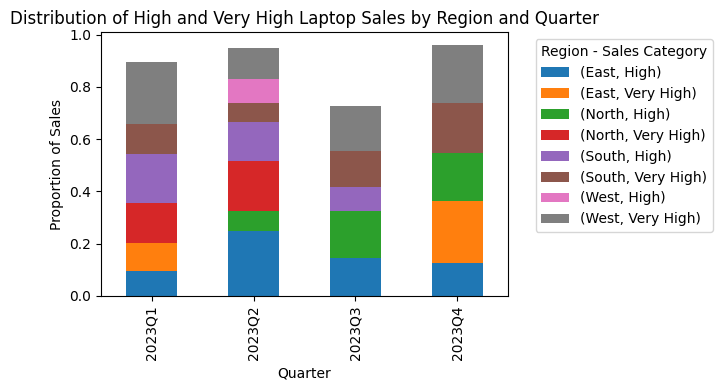

In [51]:
# Visualize the results
import matplotlib.pyplot as plt

laptop_high_sales.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title('Distribution of High and Very High Laptop Sales by Region and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Sales')
plt.legend(title='Region - Sales Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This complex example demonstrates how `crosstab()` can be used to create a multi-dimensional analysis of our sales data:

1. We categorize sales into different levels.
2. We create a cross-tabulation that shows the distribution of sales categories for each product, in each region, across quarters.
3. We normalize the data to show proportions.
4. We then focus on a specific product (Laptops) and sales categories (High and Very High).
5. Finally, we visualize the results to show how the distribution of high-value Laptop sales varies across regions and quarters.


Key points to remember about `crosstab()`:

1. It's excellent for analyzing relationships between categorical variables.
2. You can use multiple variables for both rows and columns.
3. The `values` parameter allows you to specify a column to aggregate.
4. The `aggfunc` parameter lets you choose how to aggregate the values.
5. You can normalize the results to show proportions or percentages.
6. It's a powerful tool for exploratory data analysis and feature engineering.


By mastering the `crosstab()` function, you can quickly gain insights into the relationships and distributions within your categorical data, which is crucial for many data analysis and machine learning tasks.

## <a id='toc6_'></a>[Discretization and Categorization](#toc0_)

Discretization is the process of converting continuous variables into discrete categories. This technique is often used in data preprocessing for statistical analysis, machine learning, and data visualization. Pandas provides two main functions for discretization: `cut()` and `qcut()`.


### <a id='toc6_1_'></a>[`cut()` Function](#toc0_)


The `cut()` function is used to bin values into discrete intervals. It divides the range of values into intervals of equal width.


Let's use our sales data to demonstrate the `cut()` function:


In [52]:
# Assuming we have our df DataFrame from previous examples
# If not, you can recreate it using the code from the introduction

# Binning sales data into categories
df['SalesCategory'] = pd.cut(
    df['Sales'],
    bins=[0, 500, 1000, 1500, np.inf], 
    labels=['Low', 'Medium', 'High', 'Very High']
)

df[['Product', 'Sales', 'SalesCategory']].head(15)

,Product,Sales,SalesCategory
0,Laptop,1926,Very High
1,Laptop,1660,Very High
2,Laptop,1930,Very High
3,Laptop,1844,Very High
4,Smartphone,621,Medium
5,Smartphone,714,Medium
6,Smartphone,958,Medium
7,Smartphone,1163,High
8,Tablet,449,Low
9,Tablet,557,Medium


In [53]:
# Analyze the distribution of sales categories
sales_distribution = df['SalesCategory'].value_counts().sort_index()
print("\nDistribution of Sales Categories:")
print(sales_distribution)


Distribution of Sales Categories:
SalesCategory
Low          70
Medium       62
High         36
Very High    24
Name: count, dtype: int64


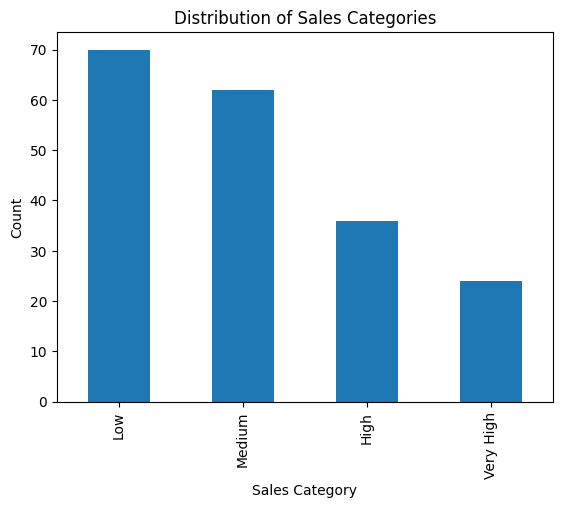

In [54]:
# Visualize the distribution
import matplotlib.pyplot as plt

sales_distribution.plot(kind='bar')
plt.title('Distribution of Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.show()

In this example, we've categorized sales into four categories: Low, Medium, High, and Very High. The `cut()` function allows us to specify the bin edges and corresponding labels.


We can also use `cut()` to create bins of equal width:


In [55]:
# Create 5 bins of equal width
df['SalesBins'] = pd.cut(df['Sales'], bins=5)

df[['Product', 'Sales', 'SalesBins']].head(15)

,Product,Sales,SalesBins
0,Laptop,1926,"(1880.0, 2298.0]"
1,Laptop,1660,"(1462.0, 1880.0]"
2,Laptop,1930,"(1880.0, 2298.0]"
3,Laptop,1844,"(1462.0, 1880.0]"
4,Smartphone,621,"(205.91, 626.0]"
5,Smartphone,714,"(626.0, 1044.0]"
6,Smartphone,958,"(626.0, 1044.0]"
7,Smartphone,1163,"(1044.0, 1462.0]"
8,Tablet,449,"(205.91, 626.0]"
9,Tablet,557,"(205.91, 626.0]"


In [56]:
# Analyze the distribution of sales bins
bins_distribution = df['SalesBins'].value_counts().sort_index()
print("\nDistribution of Sales Bins:")
print(bins_distribution)


Distribution of Sales Bins:
SalesBins
(205.91, 626.0]     84
(626.0, 1044.0]     56
(1044.0, 1462.0]    26
(1462.0, 1880.0]    21
(1880.0, 2298.0]     5
Name: count, dtype: int64


### <a id='toc6_2_'></a>[`qcut()` Function (for quantile-based discretization)](#toc0_)


While `cut()` creates bins of equal width, `qcut()` creates bins with equal frequencies. This is particularly useful when you want to divide your data into quantiles.


Let's use `qcut()` to create quartiles of our sales data:


In [57]:
# Create quartiles of sales data
df['SalesQuartile'] = pd.qcut(df['Sales'], q=6)

df[['Product', 'Sales', 'SalesQuartile']]

,Product,Sales,SalesQuartile
0,Laptop,1926,"(1369.5, 2298.0]"
1,Laptop,1660,"(1369.5, 2298.0]"
2,Laptop,1930,"(1369.5, 2298.0]"
3,Laptop,1844,"(1369.5, 2298.0]"
4,Smartphone,621,"(479.667, 676.0]"
...,...,...,...
187,Tablet,673,"(479.667, 676.0]"
188,Smartwatch,295,"(207.999, 356.833]"
189,Smartwatch,411,"(356.833, 479.667]"
190,Smartwatch,387,"(356.833, 479.667]"


In [58]:
# Create quartiles of sales data
df['SalesQuartile'] = pd.qcut(df['Sales'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df[['Product', 'Sales', 'SalesQuartile']]

,Product,Sales,SalesQuartile
0,Laptop,1926,Q4
1,Laptop,1660,Q4
2,Laptop,1930,Q4
3,Laptop,1844,Q4
4,Smartphone,621,Q2
...,...,...,...
187,Tablet,673,Q2
188,Smartwatch,295,Q1
189,Smartwatch,411,Q1
190,Smartwatch,387,Q1


In [59]:
# Analyze the distribution of sales quartiles
quartile_distribution = df['SalesQuartile'].value_counts().sort_index()
print("\nDistribution of Sales Quartiles:")
print(quartile_distribution)


Distribution of Sales Quartiles:
SalesQuartile
Q1    48
Q2    48
Q3    48
Q4    48
Name: count, dtype: int64


In this example, `qcut()` has divided our sales data into four quartiles, each containing approximately the same number of observations.


Let's compare `cut()` and `qcut()` on our 'Avg_Price' column:


In [60]:
# Using cut() for equal-width bins
df['PriceCategory_EqualWidth'] = pd.cut(df['Avg_Price'], bins=4, labels=['Budget', 'Mid-range', 'High-end', 'Premium'])

In [61]:
# Using qcut() for equal-frequency bins
df['PriceCategory_EqualFreq'] = pd.qcut(df['Avg_Price'], q=4, labels=['Budget', 'Mid-range', 'High-end', 'Premium'])

In [62]:
# Compare the distributions
df[['Product', 'Avg_Price', 'PriceCategory_EqualWidth', 'PriceCategory_EqualFreq']]

,Product,Avg_Price,PriceCategory_EqualWidth,PriceCategory_EqualFreq
0,Laptop,240.750000,High-end,Premium
1,Laptop,87.368421,Budget,Premium
2,Laptop,160.833333,Mid-range,Premium
3,Laptop,167.636364,Mid-range,Premium
4,Smartphone,22.178571,Budget,Budget
...,...,...,...,...
187,Tablet,74.777778,Budget,High-end
188,Smartwatch,24.583333,Budget,Budget
189,Smartwatch,17.125000,Budget,Budget
190,Smartwatch,19.350000,Budget,Budget


In [63]:
# Analyze the distributions
equal_width_dist = df['PriceCategory_EqualWidth'].value_counts().sort_index()
equal_freq_dist = df['PriceCategory_EqualFreq'].value_counts().sort_index()

print("\nDistribution of Price Categories (Equal Width):")
print(equal_width_dist)
print("\nDistribution of Price Categories (Equal Frequency):")
print(equal_freq_dist)


Distribution of Price Categories (Equal Width):
PriceCategory_EqualWidth
Budget       156
Mid-range     25
High-end       7
Premium        4
Name: count, dtype: int64

Distribution of Price Categories (Equal Frequency):
PriceCategory_EqualFreq
Budget       48
Mid-range    48
High-end     48
Premium      48
Name: count, dtype: int64


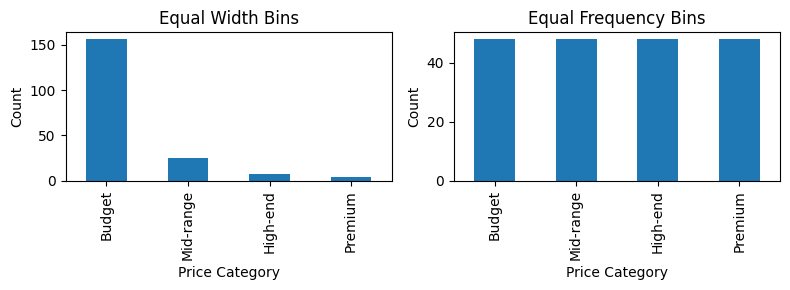

In [64]:
# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

equal_width_dist.plot(kind='bar', ax=ax1, title='Equal Width Bins')
ax1.set_xlabel('Price Category')
ax1.set_ylabel('Count')

equal_freq_dist.plot(kind='bar', ax=ax2, title='Equal Frequency Bins')
ax2.set_xlabel('Price Category')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

This comparison demonstrates the key difference between `cut()` and `qcut()`:
- `cut()` creates bins of equal width, which can lead to uneven distributions if the data is not uniformly distributed.
- `qcut()` creates bins with equal frequencies, ensuring a more even distribution across categories.


Key points to remember about discretization and categorization:

1. `cut()` is useful when you have meaningful bin edges (e.g., specific price points or age ranges).
2. `qcut()` is helpful when you want to create groups with equal frequencies (e.g., quartiles, deciles).
3. Both functions can be used with custom labels for better interpretability.
4. Discretization can be useful for:
   - Simplifying data for analysis or visualization
   - Creating features for machine learning models
   - Handling outliers by grouping extreme values
   - Performing analyses based on categories (e.g., low/medium/high price ranges)

5. Be cautious about information loss when discretizing continuous variables.
6. Consider the nature of your data and analysis goals when choosing between `cut()` and `qcut()`.


By mastering these discretization techniques, you can effectively transform continuous data into meaningful categories, opening up new possibilities for analysis and insight generation in your data science projects.

## <a id='toc7_'></a>[Working with Dummy Variables](#toc0_)

Dummy variables, also known as one-hot encoding, are a way to represent categorical variables as binary (0 or 1) columns. This technique is widely used in data preprocessing, especially for machine learning models that require numerical input. Pandas provides convenient functions for creating and working with dummy variables.


### <a id='toc7_1_'></a>[`get_dummies()`](#toc0_)


The `get_dummies()` function is used to convert categorical variables into dummy/indicator variables.


Let's explore this function using our electronic sales data:


In [65]:
# Assuming we have our df DataFrame from previous examples
# If not, you can recreate it using the code from the introduction

# Basic usage of get_dummies()
product_dummies = pd.get_dummies(df['Product'], prefix='Product')

print("Dummy variables for Product:")
product_dummies

Dummy variables for Product:


,Product_Laptop,Product_Smartphone,Product_Smartwatch,Product_Tablet
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,False,True,False,False
...,...,...,...,...
187,False,False,False,True
188,False,False,True,False
189,False,False,True,False
190,False,False,True,False


In [66]:
# Adding dummy variables to the original DataFrame
df_with_dummies = pd.concat([df, product_dummies], axis=1)

print("\nDataFrame with dummy variables:")
df_with_dummies


DataFrame with dummy variables:


,Date,Product,Region,Sales,Units,Avg_Price,Quarter,SalesCategory,SalesBins,SalesQuartile,PriceCategory_EqualWidth,PriceCategory_EqualFreq,Product_Laptop,Product_Smartphone,Product_Smartwatch,Product_Tablet
0,2023-01-31,Laptop,North,1926,8,240.750000,2023Q1,Very High,"(1880.0, 2298.0]",Q4,High-end,Premium,True,False,False,False
1,2023-01-31,Laptop,South,1660,19,87.368421,2023Q1,Very High,"(1462.0, 1880.0]",Q4,Budget,Premium,True,False,False,False
2,2023-01-31,Laptop,East,1930,12,160.833333,2023Q1,Very High,"(1880.0, 2298.0]",Q4,Mid-range,Premium,True,False,False,False
3,2023-01-31,Laptop,West,1844,11,167.636364,2023Q1,Very High,"(1462.0, 1880.0]",Q4,Mid-range,Premium,True,False,False,False
4,2023-01-31,Smartphone,North,621,28,22.178571,2023Q1,Medium,"(205.91, 626.0]",Q2,Budget,Budget,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-12-31,Tablet,West,673,9,74.777778,2023Q4,Medium,"(626.0, 1044.0]",Q2,Budget,High-end,False,False,False,True
188,2023-12-31,Smartwatch,North,295,12,24.583333,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False
189,2023-12-31,Smartwatch,South,411,24,17.125000,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False
190,2023-12-31,Smartwatch,East,387,20,19.350000,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False


In this example, `get_dummies()` has created a binary column for each unique product.


Let's apply `get_dummies()` to multiple columns:


In [67]:
# Create dummy variables for multiple columns
categorical_cols = ['Product', 'Region']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("DataFrame with multiple encoded variables:")
df_encoded

DataFrame with multiple encoded variables:


,Date,Sales,Units,Avg_Price,Quarter,SalesCategory,SalesBins,SalesQuartile,PriceCategory_EqualWidth,PriceCategory_EqualFreq,Product_Laptop,Product_Smartphone,Product_Smartwatch,Product_Tablet,Region_East,Region_North,Region_South,Region_West
0,2023-01-31,1926,8,240.750000,2023Q1,Very High,"(1880.0, 2298.0]",Q4,High-end,Premium,True,False,False,False,False,True,False,False
1,2023-01-31,1660,19,87.368421,2023Q1,Very High,"(1462.0, 1880.0]",Q4,Budget,Premium,True,False,False,False,False,False,True,False
2,2023-01-31,1930,12,160.833333,2023Q1,Very High,"(1880.0, 2298.0]",Q4,Mid-range,Premium,True,False,False,False,True,False,False,False
3,2023-01-31,1844,11,167.636364,2023Q1,Very High,"(1462.0, 1880.0]",Q4,Mid-range,Premium,True,False,False,False,False,False,False,True
4,2023-01-31,621,28,22.178571,2023Q1,Medium,"(205.91, 626.0]",Q2,Budget,Budget,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2023-12-31,673,9,74.777778,2023Q4,Medium,"(626.0, 1044.0]",Q2,Budget,High-end,False,False,False,True,False,False,False,True
188,2023-12-31,295,12,24.583333,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False,False,True,False,False
189,2023-12-31,411,24,17.125000,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False,False,False,True,False
190,2023-12-31,387,20,19.350000,2023Q4,Low,"(205.91, 626.0]",Q1,Budget,Budget,False,False,True,False,True,False,False,False


In [68]:
# Check the new shape of the DataFrame
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"Encoded DataFrame shape: {df_encoded.shape}")


Original DataFrame shape: (192, 12)
Encoded DataFrame shape: (192, 18)


The `get_dummies()` function is particularly useful in several scenarios:

1. **Preparing data for machine learning**: Many algorithms require numerical input and perform better with one-hot encoded categorical variables.

2. **Handling nominal categorical data**: When there's no inherent order in categories.

3. **Analyzing the impact of specific categories**: Each category gets its own column, making it easier to assess its individual impact.


### <a id='toc7_2_'></a>[`from_dummies()`](#toc0_)


The `from_dummies()` function is a newer addition to Pandas (introduced in version 1.5.0) that allows you to convert dummy variables back into a single categorical column. This can be useful for data interpretation or when you need to reverse the one-hot encoding process.


```python
# Assuming we have our df_encoded DataFrame from the previous example

# Convert dummy variables back to a categorical column
df_decoded = pd.from_dummies(df_encoded.filter(like='Product_'), sep='_')

print("Decoded Product column:")
print(df_decoded.head())

# You can also specify the prefix to look for
df_decoded_region = pd.from_dummies(df_encoded, prefix='Region')

print("\nDecoded Region column:")
print(df_decoded_region.head())
```


Key points to remember about working with dummy variables:

1. `get_dummies()` creates a binary column for each category in a categorical variable.
2. It's useful for preparing data for machine learning models that require numerical input.
3. It can significantly increase the number of columns in your DataFrame, which may lead to the "curse of dimensionality" for some models.
4. By default, it drops the first category to avoid multicollinearity (you can change this with the `drop_first` parameter).
5. You can use the `prefix` parameter to add a prefix to the new column names for clarity.
6. `from_dummies()` allows you to reverse the process, which can be useful for interpretation or data manipulation.


Here's an example showing how to handle dummy variables with new categories:


```python
# Create a training set
train_df = df.sample(frac=0.8, random_state=42)

# Create dummy variables for the training set
train_encoded = pd.get_dummies(train_df, columns=['Product', 'Region'])

# Create a test set with a new category
test_df = df.drop(train_df.index)
test_df.loc[test_df.index[0], 'Product'] = 'New Product'

# Encode the test set
test_encoded = pd.get_dummies(test_df, columns=['Product', 'Region'])

# Align the test set with the training set
train_cols = train_encoded.columns
test_aligned = test_encoded.reindex(columns=train_cols, fill_value=0)

print("Test set with new category aligned to training set:")
print(test_aligned[['Product_Laptop', 'Product_Smartphone', 'Product_Tablet', 'Product_Smartwatch', 'Product_New Product']].head())
```


This last example shows how to handle new categories in test data that weren't present in the training data, which is a common scenario in real-world machine learning projects.


By understanding and effectively using `get_dummies()` and `from_dummies()`, you can efficiently encode categorical variables for various data analysis and machine learning tasks, while being aware of their characteristics and potential pitfalls.